In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('data/data.csv')

In [2]:
df.head()

,Date,Hour,Consumption (MWh)
0,01.01.2016,00:00,"26,277.24"
1,01.01.2016,01:00,"24,991.82"
2,01.01.2016,02:00,"23,532.61"
3,01.01.2016,03:00,"22,464.78"
4,01.01.2016,04:00,"22,002.91"


In [3]:
df['Date'] =pd.to_datetime(df['Date'] +' '+ df['Hour'], format='%d.%m.%Y %H:%M')
df = df.drop('Hour', axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               35064 non-null  datetime64[ns]
 1   Consumption (MWh)  35064 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 548.0+ KB


In [5]:
df['Consumption (MWh)']=df['Consumption (MWh)'].str.replace(',','').astype(float)
df=df.sort_values('Date')

In [6]:
seasons = {
    12: 'winter',
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'autumn',
    10: 'autumn',
    11: 'autumn',
}

In [7]:
df['HOUROFDAY'] = df['Date'].dt.hour
df['QUARTER'] = df['Date'].dt.quarter
df['DAY'] = df['Date'].dt.day
df['MONTH'] = df['Date'].dt.month
df['YEAR'] = df['Date'].dt.year
df['WEEKDAY'] = df['Date'].dt.weekday
df['WEEK'] = df['Date'].dt.weekofyear
df['DAYOFYEAR'] = df['Date'].dt.dayofyear
df['WEEKEND'] = df['WEEKDAY'].apply( lambda x: 0 if x in [0,1,2,3,4] else 1 )
df['SEASON'] = df['MONTH'].map( seasons )

q1=df['Consumption (MWh)'].quantile(0.25)
q3=df['Consumption (MWh)'].quantile(0.75)
iqr=q3-q1
ub = q3+1.5*iqr
lb= q1-1.5*iqr
df['outlier']=df['Consumption (MWh)'].apply(lambda x: 1 if x>ub else (1 if x<lb else 0))
df = df.drop([2066])
del df['outlier']

df.shape


C:\Users\emire\AppData\Local\Temp\ipykernel_13752\4192440375.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WEEK'] = df['Date'].dt.weekofyear


(35063, 12)

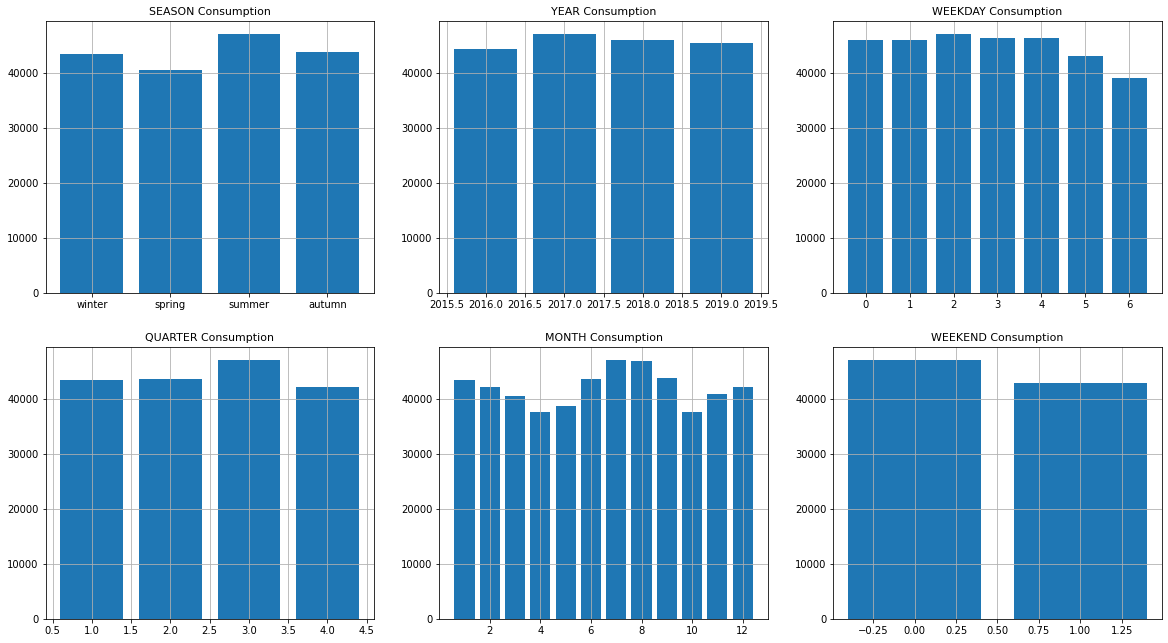

In [8]:
plt.figure(figsize = (20, 11))

plt.subplot(2, 3, 1)
plt.bar(df['SEASON'],df['Consumption (MWh)'])
plt.title('SEASON Consumption', fontsize=11)
plt.grid()

plt.subplot(2, 3, 2)
plt.bar(df['YEAR'],df['Consumption (MWh)'])
plt.title('YEAR Consumption', fontsize=11)
plt.grid()

plt.subplot(2, 3, 3)
plt.bar(df['WEEKDAY'],df['Consumption (MWh)'])
plt.title('WEEKDAY Consumption', fontsize=11)
plt.grid()

plt.subplot(2, 3, 4)
plt.bar(df['QUARTER'],df['Consumption (MWh)'])
plt.title('QUARTER Consumption', fontsize=11)
plt.grid()

plt.subplot(2, 3, 5)
plt.bar(df['MONTH'],df['Consumption (MWh)'])
plt.title('MONTH Consumption', fontsize=11)
plt.grid()

plt.subplot(2, 3, 6)
plt.bar(df['WEEKEND'],df['Consumption (MWh)'])
plt.title('WEEKEND Consumption', fontsize=11)
plt.grid()

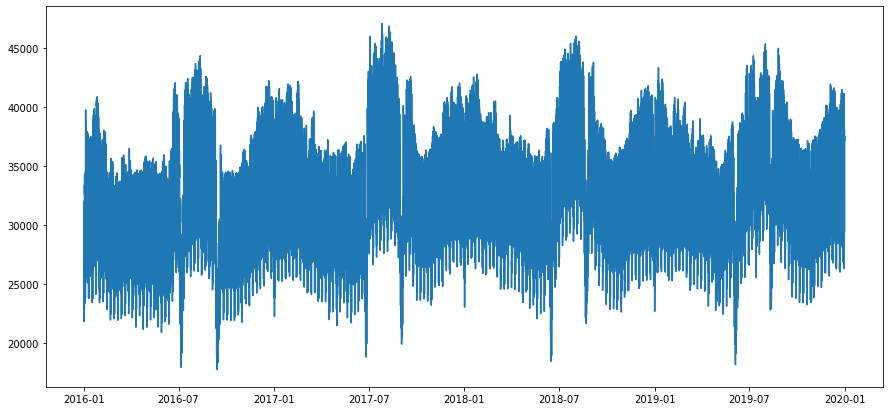

In [9]:
plt.figure(figsize = (15, 7))
plt.plot(df['Date'],df['Consumption (MWh)'])
plt.show()

In [10]:

df['lag1weekafter3days'] = df['Consumption (MWh)'][72:].shift(168)
df['lag2weekafter3days'] = df['Consumption (MWh)'][72:].shift(336)
df['lag28days'] = df['Consumption (MWh)'].shift(672)
df['lag29days'] = df['Consumption (MWh)'].shift(696)
df['lag30days'] = df['Consumption (MWh)'].shift(720)
df['lag31days'] = df['Consumption (MWh)'].shift(744)
df['ma1weekafter3days'] = df['Consumption (MWh)'][72:].rolling(window=168).mean()
df['ma2weekafter3days'] = df['Consumption (MWh)'][72:].rolling(window=336).mean()
df['ma28days'] = df['Consumption (MWh)'].rolling(window=672).mean()
df['ma29days'] = df['Consumption (MWh)'].rolling(window=696).mean()
df['ma30days'] = df['Consumption (MWh)'].rolling(window=720).mean()
df['ma31days'] = df['Consumption (MWh)'].rolling(window=744).mean()
df['std1weekafter3days'] = df['Consumption (MWh)'][72:].rolling(window=168).std()
df['std2weekafter3days'] = df['Consumption (MWh)'][72:].rolling(window=336).std()
df['std28days'] = df['Consumption (MWh)'].rolling(window=672).std()
df['std29days'] = df['Consumption (MWh)'].rolling(window=696).std()
df['std30days'] = df['Consumption (MWh)'].rolling(window=720).std()
df['std31days'] = df['Consumption (MWh)'].rolling(window=744).std()
df['median1weekafter3days'] = df['Consumption (MWh)'][72:].rolling(window=168).median()
df['median2weekafter3days'] = df['Consumption (MWh)'][72:].rolling(window=336).median()
df['median28days'] = df['Consumption (MWh)'].rolling(window=672).median()
df['median29days'] = df['Consumption (MWh)'].rolling(window=696).median()
df['median30days'] = df['Consumption (MWh)'].rolling(window=720).median()
df['median31days'] = df['Consumption (MWh)'].rolling(window=744).median()
df = pd.get_dummies(df, columns=['SEASON'])

items_to_remove = []

for x in df:
    
    if str(df.dtypes[x]) in ['int64', 'float64']:
        if  abs(df[x].corr(df['Consumption (MWh)'])) < 0.20:
            items_to_remove.append(x)
columns=df.columns
#! ELIMINATING INTERCORRELATED
for x1 in columns:
	for x2 in columns:
		if str(df.dtypes[x1]) in ['int64', 'float64']:
			if str(df.dtypes[x2]) in ['int64', 'float64']:
				if x1 > x2:
					if x1 != 'Consumption (MWh)' and x2 != 'Consumption (MWh)':
						c = df[x1].corr(df[x2])
						if abs(c) > 0.90:
							
							items_to_remove.append(x1)


dellist=list(set(items_to_remove))

df = df.drop(dellist, axis=1)
df = df.dropna()



Text(0.5, 1.0, 'Correlation Heatmap')

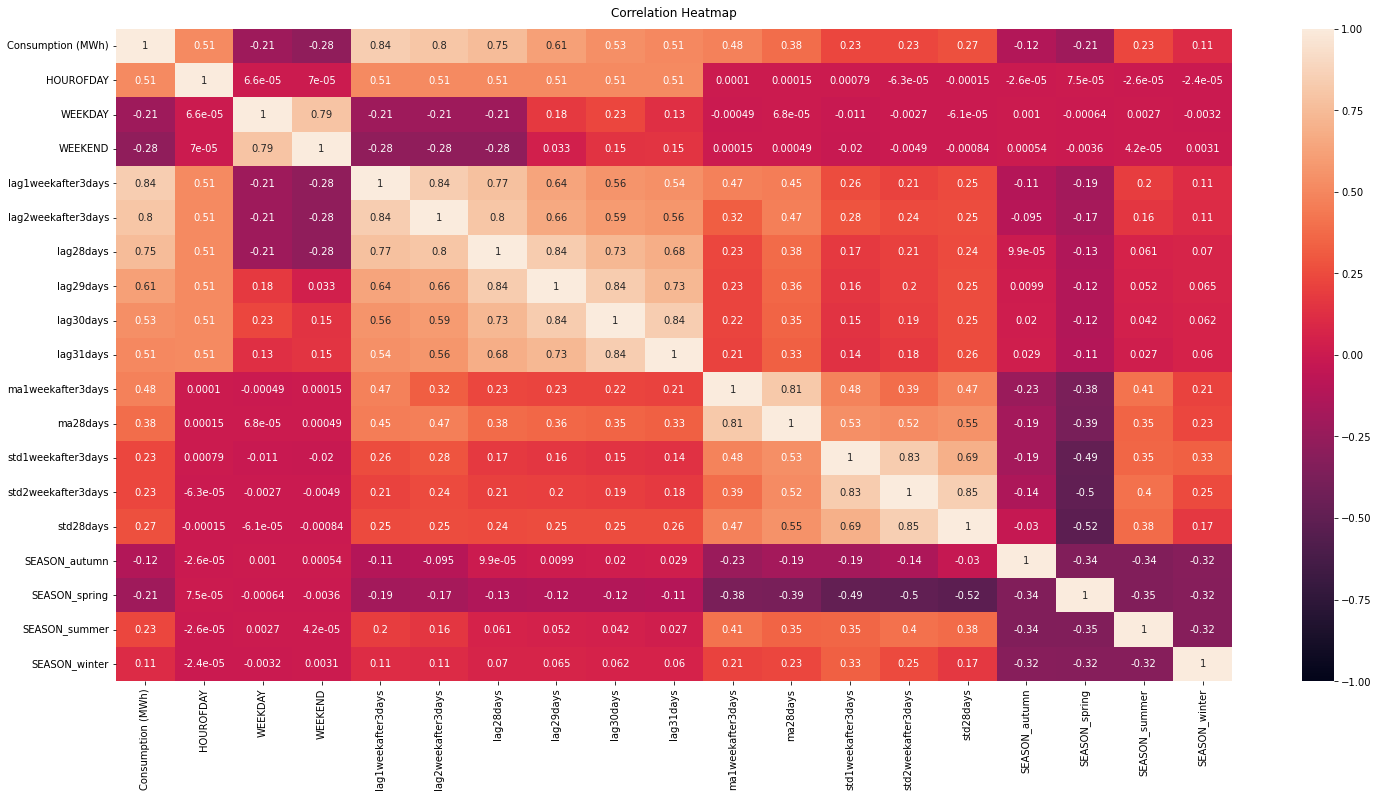

In [11]:

df.corr()
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [12]:
from sklearn.model_selection import train_test_split

y=df['Consumption (MWh)']
del df['Consumption (MWh)']
X=df.copy()
del X['Date']



In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

sc1= StandardScaler()
X = sc1.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle= "False")

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
SVReg = SVR(kernel= 'rbf').fit(X_train, y_train)
Predicted_test= SVReg.predict(X_test)
print(r2_score(y_test, Predicted_test))
print(mean_squared_error(y_test, Predicted_test))


0.3786098969182329
15095411.888052832


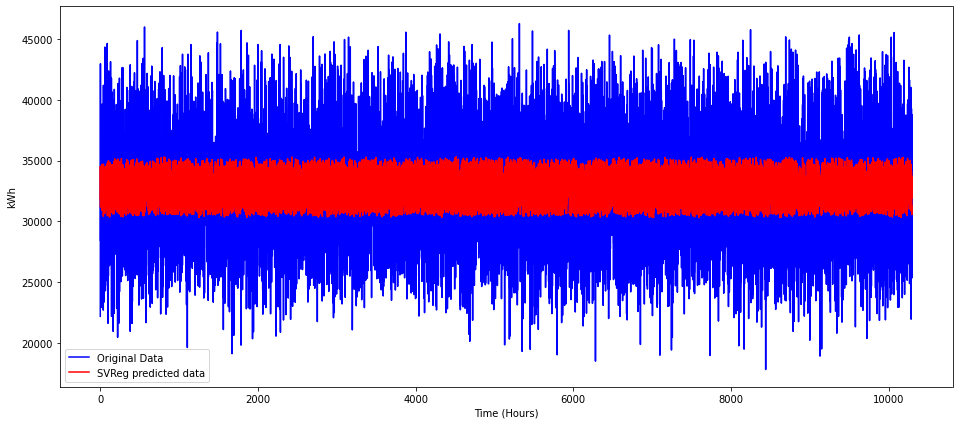

In [14]:
plt.figure(figsize=(16, 7))
plt.plot(y_test, color="b",label= 'Original Data')
plt.plot(Predicted_test, color ="red", label="SVReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0, shuffle= "False")

y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)
Predicted_test2= RFReg.predict(X_test2)
print(r2_score(y_test2, Predicted_test2))
print(mean_squared_error(y_test2, Predicted_test2))



0.9265002541760651
1780354.8480635216


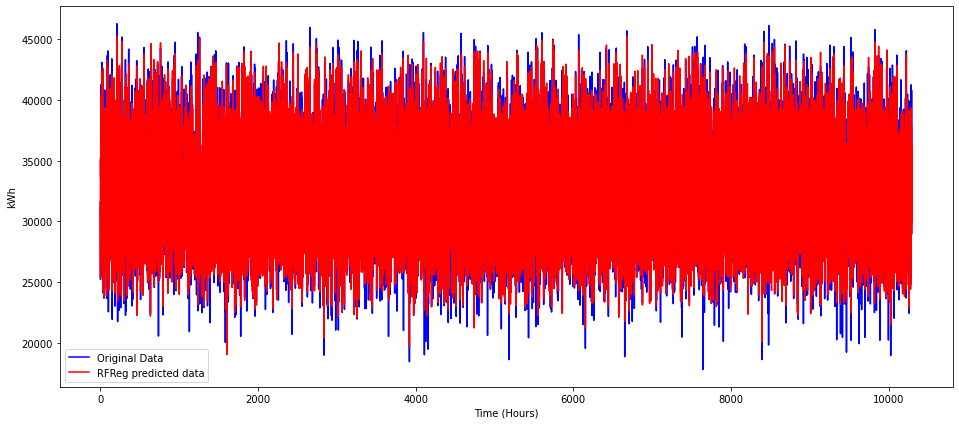

In [16]:
plt.figure(figsize=(16, 7))
plt.plot(y_test2, color="b",label= 'Original Data')
plt.plot(Predicted_test2, color ="red", label="RFReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()